# Linde-Buzo-Gray Lib Tests

## Generate codebooks of different size from fixed 3D-data

In [2]:
import lbg 

testdata = [(-1.5, 2.0, 5.0),
            (-2.0, -2.0, 0.0),
            (1.0, 1.0, 2.0),
            (1.5, 1.5, 1.2),
            (1.0, 2.0, 5.6),
            (1.0, -2.0, -2.0),
            (1.0, -3.0, -2.0),
            (1.0, -2.5, -4.5)]

for cb_size in (1, 2, 4, 8):
    print('generating codebook for size', cb_size)
    cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(testdata, cb_size)
    print('output:')
    for i, c in enumerate(cb):
        print('> %s, abs_weight=%d, rel_weight=%f' % (c, cb_abs_w[i], cb_rel_w[i]))

generating codebook for size 1
output:
> [0.375, -0.375, 0.6624999999999999], abs_weight=8, rel_weight=1.000000
generating codebook for size 2
output:
> [0.5, 1.625, 3.4499999999999997], abs_weight=4, rel_weight=0.500000
> [0.25, -2.375, -2.125], abs_weight=4, rel_weight=0.500000
generating codebook for size 4
output:
> [-0.25, 2.0, 5.3], abs_weight=2, rel_weight=0.250000
> [1.25, 1.25, 1.6], abs_weight=2, rel_weight=0.250000
> [1.0, -2.5, -2.833333333333333], abs_weight=3, rel_weight=0.375000
> [-2.0, -2.0, 0.0], abs_weight=1, rel_weight=0.125000
generating codebook for size 8
output:
> [1.0, 2.0, 5.6], abs_weight=1, rel_weight=0.125000
> [-1.5, 2.0, 5.0], abs_weight=1, rel_weight=0.125000
> [1.0, 1.0, 2.0], abs_weight=1, rel_weight=0.125000
> [1.5, 1.5, 1.2], abs_weight=1, rel_weight=0.125000
> [1.0, -2.5, -4.5], abs_weight=1, rel_weight=0.125000
> [1.0, -2.5, -2.0], abs_weight=2, rel_weight=0.250000
> [-2.00002, -2.00002, 0.0], abs_weight=0, rel_weight=0.000000
> [-2.0, -2.0, 0.0], 

## Generate codebook for random Gauss distribution

CPU times: user 6.89 ms, sys: 139 µs, total: 7.03 ms
Wall time: 7.17 ms


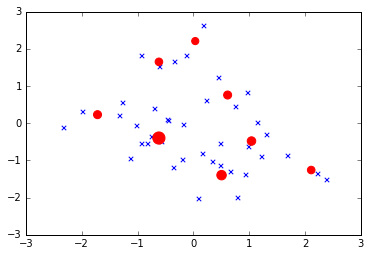

In [8]:
import matplotlib.pyplot as plt

import random
import lbg

%matplotlib inline

N = 40   # population size
SIZE_CODEBOOK = 8

random.seed(0)

# generate random Gauss distribution with µ=0, sigma=1
population = [(random.gauss(0, 1), random.gauss(0, 1))
              for _ in range(N)]

# display population as blue crosses
plt.scatter([p[0] for p in population], [p[1] for p in population], marker='x', color='blue')

# generate codebook
%time cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(population, SIZE_CODEBOOK)

# display codebook as red filled circles
# codevectors with higher weight (more points near them) get bigger radius
plt.scatter([p[0] for p in cb], [p[1] for p in cb], s=[((w+1) ** 5) * 40 for w in cb_rel_w], marker='o', color='red')

plt.show()

## Generate codebook for population that is centered in several areas

CPU times: user 8.75 ms, sys: 227 µs, total: 8.98 ms
Wall time: 8.87 ms


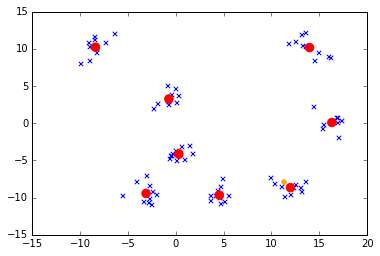

In [10]:
import random
import matplotlib.pyplot as plt

import lbg

%matplotlib inline

NUM_AREAS = 8
NUM_POINTS_PER_AREA = 10
SIZE_CODEBOOK = 8
AREA_MIN_MAX = ((-20, 20), (-20, 20))

random.seed(0)

# create random centroids for NUM_AREAS areas
area_centroids = [(random.uniform(*AREA_MIN_MAX[0]), random.uniform(*AREA_MIN_MAX[1]))
                  for _ in range(NUM_AREAS)]

# display random centroids as orange cicles
plt.scatter([p[0] for p in area_centroids], [p[1] for p in area_centroids], marker='o', color='orange')

# create whole population
population = []
for c in area_centroids:
    # create random points around the centroid c
    area_points = [(random.gauss(c[0], 1.0), random.gauss(c[1], 1.0)) for _ in range(NUM_POINTS_PER_AREA)]
    population.extend(area_points)

# display the population as blue crosses
plt.scatter([p[0] for p in population], [p[1] for p in population], marker='x', color='blue')

# generate codebook
%time cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(population, SIZE_CODEBOOK)

# display codebook as red filled circles
# codevectors with higher weight (more points near them) get bigger radius
plt.scatter([p[0] for p in cb], [p[1] for p in cb], s=[((w+1) ** 5) * 40 for w in cb_rel_w], marker='o', color='red')

plt.show()
